In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
# !pip install statsmodels

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'dataset_02a.csv' 
data = pd.read_csv(file_path)
# Display the first few rows of the dataset
print(data.head())





[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 217.9 kB/s eta 0:00:46
   ---------------------------------------- 0.0/9.9 MB 281.8 kB/s eta 0:00:35
   ---------------------------------------- 0.1/9.9 MB 435.7 kB/s eta 0:00:23
    --------------------------------------- 0.2/9.9 MB 787.7 kB/s eta 0:00:13
   - -------------------------------------- 0.3/9.9 MB 983.9 kB/s eta 0:00:10
   - -------------------------------------- 0.4/9.9 MB 1.2 MB/s eta 0:00:09
   -- ------------------------------------- 0.5/9.9 MB 1.4 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/9.9 MB 1.5 MB/s eta 0:00:07
   --- ------------------------------------ 0.7/9.9 MB 1.6 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.9 MB 1.6 MB/s eta 0:00:06
   --- ------------------------------------ 0.9/9.9 MB 1.6 MB/s eta 0:00:06
   ---- --------

In [ ]:

# Step 1: Prepare the data
X = data[['x1', 'x2']]# Select x1 and x2 as the independent variables.
y = data['y']# Select y as the dependent variable.

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Extend the feature set with polynomial terms
#PolynomialFeatures automatically creates all polynomial terms of degree 2  including  ['x1' 'x2' 'x1^2' 'x1 x2' 'x2^2']
poly = PolynomialFeatures(degree=2, include_bias=False)# Create polynomial terms of degree 2.
# fit_transform function applies this transformation to the training data
X_poly_train = poly.fit_transform(X_train)# Generate polynomial features for training data.
X_poly_test = poly.transform(X_test) # Generate polynomial features for testing data.

# Display the polynomial features
print(f"Polynomial features: {poly.get_feature_names_out()}")



Polynomial features: ['x1' 'x2' 'x1^2' 'x1 x2' 'x2^2']


In [10]:
# Step 2: Fitting the Model
# Train a polynomial regression model using the expanded feature set
poly_model = LinearRegression()  # Initialize a linear regression model.
#Fit the model using polynomial features (X_poly_train) and target (y_train)
# .fit() calculates the relationship between the polynomial features (X_poly_train) and target (y_train)
# .fit() determines the coefficients (weights)  for each feature that minimize the difference between the predicted y and the actual y
poly_model.fit(X_poly_train, y_train)  # Train the model using the polynomial features.
# This step essentially fits a curve (instead of a straight line) to the data, capturing the non-linear relationship.
# Get the model coefficients and intercept
print("Coefficients:", poly_model.coef_)
print("Intercept:", poly_model.intercept_)

Coefficients: [ 3.05504318e+00 -2.02423067e+00  8.64270157e-04  1.00119544e+00
 -3.26549651e-03]
Intercept: -6.023600292476294


In [12]:
# Evaluate the model’s performance using MSE and R^2


y_train_pred = poly_model.predict(X_poly_train)  # Predict on the training set.
y_test_pred = poly_model.predict(X_poly_test)  # Predict on the test set.
# Measure the model's accuracy using MSE and R^2
# Mean Squared Error (MSE): The average squared difference between predicted and actual values.(lower is better).

mse_train = mean_squared_error(y_train, y_train_pred)  # Calculate MSE for training data.
mse_test = mean_squared_error(y_test, y_test_pred)  # Calculate MSE for test data.
# R^2  showing how much of the variance in y is explained by the model.(closer to 1 is better).
r2_train = r2_score(y_train, y_train_pred)  # Calculate R^2 for training data.
r2_test = r2_score(y_test, y_test_pred)  # Calculate R^2 for test data.

print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
print(f"Train R^2: {r2_train:.4f}, Test R^2: {r2_test:.4f}")


Train MSE: 0.8710, Test MSE: 1.4981
Train R^2: 0.9989, Test R^2: 0.9990


In [7]:
# Compare the polynomial model to a simpler linear regression model
# Fit a simpler linear regression model (with only x1 and x2 as features).
# compare its MSE and R^2 to the polynomial model.
linear_model = LinearRegression()  # Initialize a linear regression model.
linear_model.fit(X_train, y_train)  # Train the linear model on the original features.

# Predict and evaluate performance
y_linear_train_pred = linear_model.predict(X_train)  # Training predictions.
y_linear_test_pred = linear_model.predict(X_test)  # Test predictions.

mse_linear_train = mean_squared_error(y_train, y_linear_train_pred)  # Linear model MSE.
mse_linear_test = mean_squared_error(y_test, y_linear_test_pred)

r2_linear_train = r2_score(y_train, y_linear_train_pred)  # Linear model R^2.
r2_linear_test = r2_score(y_test, y_linear_test_pred)

print(f"Linear Model Train MSE: {mse_linear_train:.4f}, Test MSE: {mse_linear_test:.4f}")
print(f"Linear Model Train R^2: {r2_linear_train:.4f}, Test R^2: {r2_linear_test:.4f}")


Linear Model Train MSE: 428.0578, Test MSE: 782.3020
Linear Model Train R^2: 0.4405, Test R^2: 0.4963


What is the best model based on the evaluation metrics?
Compare MSE and R^2 for the polynomial and linear models on the test set. The best model will have the lowest MSE and highest R^2
The Polynomial Model has a significantly lower MSE (1.4981 vs 428.0578), meaning it fits the data much better than the linear model.
The Polynomial Model also has a much higher R^2 (0.9990 vs 0.4963) , indicating that it explains almost all the variance in the dependent variable(y)


In [8]:
# When considering BIC and AIC, what is the simplest model that achieves good performance?
# AIC Measures the trade-off between the goodness of fit of the model and its complexity.
# Lower AIC = better model (it balances goodness of fit and simplicity).
# BIC= Similar to AIC, but it penalizes model complexity more strictly. Lower BIC = better model.
# How the code achieves this:
X_poly_train_sm = sm.add_constant(X_poly_train)
ols_poly_model = sm.OLS(y_train, X_poly_train_sm).fit()

print(f"Polynomial Model BIC: {ols_poly_model.bic}, AIC: {ols_poly_model.aic}")

X_train_sm = sm.add_constant(X_train)
ols_linear_model = sm.OLS(y_train, X_train_sm).fit()

print(f"Linear Model BIC: {ols_linear_model.bic}, AIC: {ols_linear_model.aic}")


Polynomial Model BIC: 242.2767086723422, AIC: 227.98454886429892
Linear Model BIC: 724.9169001542518, AIC: 717.7708202502301


When considering BIC and AIC, what is the simplest model that achieves good performance?
Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) are used to measure model complexity and goodness of fit.
A lower BIC/AIC indicates a simpler model that performs well.
Compare BIC/AIC for the polynomial and linear models to identify the simplest model.
The Polynomial Model has much lower BIC (242.28 vs. 724.92) and AIC (227.98 vs. 717.77) than the Linear Model, indicating that:
The polynomial model achieves a significantly better balance between complexity and fit compared to the linear model.
The linear model's much higher BIC/AIC values reflect its poor fit to the data, even though it is simpler.

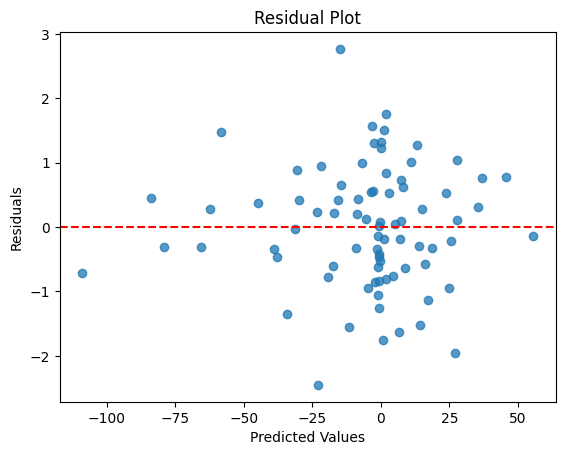

Series([], Name: y, dtype: float64)


In [9]:
# For your best model, perform an analysis of the residuals and identify if there are outliers or unusual aspects.
# The residual plot shows if there are patterns in the errors, indicating issues with the model.
# Outliers are identified as residuals greater than three standard deviations from the mean.
residuals = y_train - y_train_pred

plt.scatter(y_train_pred, residuals, alpha=0.75)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

outliers = residuals[np.abs(residuals) > 3 * residuals.std()]
print(outliers)


Residual Analysis:
Residuals are the differences between the actual values and the predicted values:
The plot shows the residuals (on the y-axis) against the predicted values (on the x-axis).
The residuals appear to be randomly scattered around the horizontal line(y=0) red dashed line), which is a good indication of a well-fitted model.
 few points fall farther from the cluster of residuals (e.g., points above 2 or below -2).
 These could potentially be outliers, but the overall randomness of the residuals suggests they are not severely impacting the model's fit.
 The residual plot shows:
A random scatter of residuals, which is a desirable property for a well-fitted model.
Minimal outliers or unusual aspects, with only a few points lying far from the cluster.
No systematic trends or patterns, indicating the model is likely appropriate for the data.
This residual analysis supports the validity of the polynomial model as the best choice.